In [77]:
# The magic commands below allow reflecting the changes in an imported module without restarting the kernel.
%load_ext autoreload
%autoreload 2


!source /lus/theta-fs0/projects/connectomics_aesp/software/neuro_env_36/bin/activate
!/lus/theta-fs0/projects/connectomics_aesp/software/neuro_env_36/bin/python -m ipykernel install --user --name jhub_neurenev36

Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/lus/theta-fs0/projects/connectomics_aesp/software/neuro_env_36/bin/activate: line 50: module: command not found
/lus/theta-fs0/projects/connectomics_aesp/software/neuro_env_36/bin/activate: line 51: module: command not found
/lus/theta-fs0/projects/connectomics_aesp/software/neuro_env_36/bin/activate: line 52: module: command not found
/lus/theta-fs0/projects/connectomics_aesp/software/neuro_env_36/bin/python: error while loading shared libraries: libpython3.6m.so.1.0: cannot open shared object file: No such file or directory


In [81]:
# We need to add balsam and the modules it depends on to the Python search paths. 
import sys
sys.path.insert(0,'/soft/datascience/Balsam/0.3.5.1/env/lib/python3.6/site-packages/')
sys.path.insert(0,'/soft/datascience/Balsam/0.3.5.1/')

import matplotlib.pyplot
#sys.path.insert(0,'/lus/theta-fs0/projects/connectomics_aesp/software/neuro_env_36/lib/python3.6/site-packages/')


from pprint import pprint
pprint(f'Python search path includes: {sys.path}')

# We also need postgresql to be in the path
import os
os.environ['PATH'] ='/soft/datascience/Balsam/0.3.5.1/env/bin/:' + os.environ['PATH']
os.environ['PATH'] +=':/soft/datascience/PostgreSQL/9.6.12/bin/'

try:
    import balsam
except:
    print('Cannot find balsam, make sure balsam is installed or it is available in Python search paths')    

    # We also need to activate Balsam database by setting the BALSAM_DB_PATH environment variable. 
# This is equivalent to `source balsamactivate jupyter_test` 
os.environ["BALSAM_DB_PATH"]='/lus/theta-fs0/projects/connectomics_aesp/balsam_database/'


from balsam_helper import *
import hpn_balsam_apps


print(os.environ["BALSAM_DB_PATH"])

Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
Updated existing app
("Python search path includes: ['/soft/datascience/Balsam/0.3.5.1/', "
 "'/soft/datascience/Balsam/0.3.5.1/env/lib/python3.6/site-packages/', "
 "'/lus/theta-fs0/projects/connectomics_aesp/software/neuro_env_36/lib/python3.6/site-packages/', "
 "'/lus/theta-fs0/projects/connectomics_aesp/software/HappyNeuron/', "
 "'/soft/datascience/tensorflow/tf1.13/', "
 "'/lus/theta-fs0/projects/connectomics_aesp/keceli/pip_ffn/', "
 "'/gpfs/mira-home/keceli/ffn/keceli_ffn/', "
 "'/soft/datascience/Balsam/0.3.5.1/', "
 "'/soft/datascience/Balsam/0.3.5.1/env/lib/python3.6/site-packages/', "
 "'/soft/datascience/Balsam/0.3.5.1/', "
 "'/soft/datascience/Balsam/0.3.5.1/env/lib/python3.6/site-packages/', "
 "'/lus/theta-fs0/projects/connectomics_aesp/software/neuro_env_36/lib/python3.6/site-packages/', "
 "'/lus/theta

# TRAKEM2 MONTAGE JOB

In [85]:
##User Inputs
workflow = "trakem2_test_v2"
RAW_INPUT="/lus/theta-fs0/projects/connectomics_aesp/pipeline_data/trakem2_HL00732_run/trakem2_HL00732/"
PROCESS_FOLDER="/lus/theta-fs0/projects/connectomics_aesp/pipeline_data/trakem2_HL00732_run/trakem2_balsam2/"
TARGET_FOLDER =''
MIN=2000
MAX=3000

##Balsam Add Montage Job
hpn_balsam_apps.sem_montage_job(workflow, RAW_INPUT, PROCESS_FOLDER,target=TARGET_FOLDER, min=MIN, max=MAX)

Input: /lus/theta-fs0/projects/connectomics_aesp/pipeline_data/trakem2_HL00732_run/trakem2_HL00732/
Output: /lus/theta-fs0/projects/connectomics_aesp/pipeline_data/trakem2_HL00732_run/trakem2_balsam2/align_raw.txt
(14000, 10833)
14000 10833 0 254 uint8
8bit
 /lus/theta-fs0/projects/connectomics_aesp/pipeline_data/trakem2_HL00732_run/trakem2_balsam2//align_raw.txt  /lus/theta-fs0/projects/connectomics_aesp/pipeline_data/trakem2_HL00732_run/trakem2_balsam2/  --min 2000  --max 3000  --fiji /lus/theta-fs0/projects/connectomics_aesp/software/Fiji.app/ImageJ-linux64 
Trakem2 Montage Job added


# TRAKEM2 ALIGN JOB

# TRAKEM2 SCRATCH SPACE

In [ ]:
# python $PRE_STACK $PROCESS_FOLDER/output $PROCESS_FOLDER/align_new.txt #input #output

#SERIAL SINGLE NODE OPERATION!!!
# $SUBMIT_THETA python $ALIGN $PROCESS_FOLDER/align_new.txt $PROCESS_FOLDER/align1 --fiji $FIJI

#$SUBMIT_THETA python $EXPORT $PROCESS_FOLDER/align_new.txt $PROCESS_FOLDER/align1 --range $RANGE --fiji $FIJI
#sleep 1



# Flood Fill Network Training Job

In [23]:
import time
TFRECORDFILE='/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/tf_record_file'
GROUNDTRUTH='/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/groundtruth.h5'
GRAYSCALE='/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/grayscale_maps.h5'
BATCHSIZE=1
OPTIMIZER='adam'
TIMESTAMP=time.strftime("%y%m%d%H%M%S")
TRAINDIR=f'train_b{BATCHSIZE}_o{OPTIMIZER}_{TIMESTAMP}'
DEPTH = 12
FOV = "33, 33, 33" 
DELTA = "8, 8, 8"

##make all of bellow into a single function that receives all of the above!!

myargs = ''
myargs += f' --train_coords {TFRECORDFILE} '
myargs += f' --data_volumes valdation1:{GRAYSCALE}:raw '
myargs += f' --label_volumes valdation1:{GROUNDTRUTH}:stack '
myargs += f' --model_name convstack_3d.ConvStack3DFFNModel '
#myargs += f' --model_args \"\{\\"depth\\": {DEPTH}, \\"fov_size\\": [{FOV}], \\"deltas\\": [{DELTA}]\}\"'
myargs += ''' --model_args "{\\"depth\\": 12, \\"fov_size\\": [33, 33, 33], \\"deltas\\": [8, 8, 8]}"'''
myargs += ' --image_mean 128 --image_stddev 33 '
myargs += ' --max_steps 400 --summary_rate_secs 60 ' 
myargs += f' --batch_size {BATCHSIZE} '
myargs += f' --optimizer {OPTIMIZER} '
myargs += ' --num_intra_threads 64 --num_inter_threads 1 '
myargs += f' --train_dir {TRAINDIR} '
print(myargs)

add_job(name='test_train',workflow='ffn_training',application='trainer',args=myargs)

SyntaxError: f-string expression part cannot include a backslash (<ipython-input-23-9e0063c2d800>, line 20)

# Flood Fill Network Inference Job

In [63]:
# Add inference jobs for each subvolume


INPUT_FILE = 'input_file_parallel.h5'
INPUT_DSET = 'image'
OUTPUT_FILE = 'output_file_parallel.h5'
OUTPUT_DSET = 'image'
OUTPUT_PATH = 'results_test_parallel6'
MEAN = 100
STD = 30
MODEL_PATH = 'model_vessel/model.ckpt-1680104'
DEPTH = 2
START = (0,0,0)
SIZE = (1000,1000,1000)
CHUNK_SIZE = (256,256,256)
OVERLAP = (16,16,16)


##cleanup all of the bellow to receive in a single function all of the above.

bbox = bounding_box.BoundingBox(start=START,size=SIZE)
pars =  (INPUT_FILE,INPUT_DSET, MEAN, STD, MODEL_PATH, OUTPUT_PATH)

test = create_inference_config(pars, 'test')
config_file = '/lus/theta-fs0/projects/connectomics_aesp/ravescovi/ffn_vessels_overlay_sean_anno/wholebrain.pbtxt'

boxes = divide_bounding_box(bbox,subvolume_size=CHUNK_SIZE,overlap=OVERLAP)
print(f'Number of subvolumes: {len(boxes)}')

generate_balsam_inference_jobs(boxes, config_file, workflow_name='inference_8_8_v13')


image {
                  hdf5: "input_file_parallel.h5:image"
                }
                image_mean: 100
                image_stddev: 30
                checkpoint_interval: 1800
                seed_policy: "PolicyPeaks"
                model_checkpoint_path: "model_vessel/model.ckpt-1680104"
                model_name: "convstack_3d.ConvStack3DFFNModel"
                model_args: "{\"depth\": 2, \"fov_size\": [5,5,5], \"deltas\": [1, 1, 1]}"
                segmentation_output_dir: "results_test_parallel6"
                inference_options {
                  init_activation: 0.9
                  pad_value: 0.05
                  move_threshold: 0.1
                  min_boundary_dist { x: 1 y: 1 z: 1}
                  segment_threshold: 0.08
                  min_segment_size: 10
                }
Number of subvolumes: 125


# BALSAM WORKFLOW SUBMISSION

In [54]:
# If you see 'Submit OK:', Job submission is succesful.

workflow = 'trakem2_test_v2'

submit(project='connectomics_aesp',
       queue='debug-cache-quad',
       nodes=4,
       wall_minutes=40,
       wf_filter=workflow)


Submit OK: Qlaunch {   'command': '/lus/theta-fs0/projects/connectomics_aesp/balsam_database/qsubmit/qlaunch94.sh',
    'from_balsam': True,
    'id': 94,
    'job_mode': 'mpi',
    'nodes': 4,
    'prescheduled_only': False,
    'project': 'connectomics_aesp',
    'queue': 'debug-cache-quad',
    'scheduler_id': 379814,
    'state': 'submitted',
    'wall_minutes': 40,
    'wf_filter': 'trakem2_test_v2'}


# BALSAM WORKFLOW ANALISER

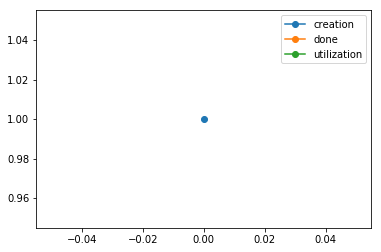

In [52]:
# Balsam metadata
from balsam.core.models import utilization_report, throughput_report, process_job_times, BalsamJob
from matplotlib import pyplot as plt

workflow = "trakem2_test_v1"

##useful stuff
query = BalsamJob.objects.filter(workflow=workflow)
time_dat = process_job_times(query) #filters into a single workflow
[j.runtime_seconds for j in query] # full time per balsam Job

times_created, num_created = sorted(time_dat['CREATED']), range(1, len(time_dat["CREATED"])+1)

t0 = min(times_created)

def mins(t):
    return (t-t0).total_seconds() / 60

plt.step([mins(t) for t in times_created] ,num_created, 'o', where='post',label='creation')
times, num_thru = throughput_report(time_dat)
plt.step([mins(t) for t in times], num_thru,  'o', where='post', label='done')

times_u, num_util = utilization_report(time_dat)
plt.step([mins(t) for t in times_u], num_util, 'o', where='post', label='utilization')
plt.legend()

# Flood Fill Network MultScale Training Job

In [ ]:
#multiscale training job
TFRECORDFILE='/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/tf_record_file'
GROUNDTRUTH='/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/groundtruth.h5'
GRAYSCALE='/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/grayscale_maps.h5'
BATCHSIZE=1
OPTIMIZER='adam'

MAGS = [1,2,4,8,16]

##DOWNSAMPLE INPUT DATA AND ORGANIZE DIRS
#for mag in MAGS:
    
    
for mag in MAGS:    
    TRAINDIR=f'train_b{BATCHSIZE}_o{OPTIMIZER}_m{mag}_{TIMESTAMP}'
    myargs = ''
    myargs += f' --train_coords {TFRECORDFILE} '
    myargs += f' --data_volumes valdation1:{GRAYSCALE}:raw '
    myargs += f' --label_volumes valdation1:{GROUNDTRUTH}:stack '
    myargs += f' --model_name convstack_3d.ConvStack3DFFNModel '
    myargs += ''' --model_args "{\\"depth\\": 12, \\"fov_size\\": [33, 33, 33], \\"deltas\\": [8, 8, 8]}"'''
    myargs += ' --image_mean 128 --image_stddev 33 '
    myargs += ' --max_steps 40000000 --summary_rate_secs 360 ' 
    myargs += f' --batch_size {BATCHSIZE} '
    myargs += f' --optimizer {OPTIMIZER} '
    myargs += ' --num_intra_threads 64 --num_inter_threads 1 '
    myargs += f' --train_dir {TRAINDIR} '

    add_job(name=f'train_mag{mag}',
            workflow='ffn_training',
            application='trainer',
            args=myargs,
            ranks_per_node=rpn,
            num_nodes=nnode,
            environ_vars={'OMP_NUM_THREADS=64'})

# Scratch Space Bellow

In [5]:
# Adding a training job to the database
import time
TFRECORDFILE='/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/tf_record_file'
GROUNDTRUTH='/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/groundtruth.h5'
GRAYSCALE='/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/grayscale_maps.h5'
BATCHSIZE=1
OPTIMIZER='adam'
TIMESTAMP=time.strftime("%y%m%d%H%M%S")
for rpn in [1,4,16]:
    for nnode in [1,4,16,64]:
        TRAINDIR=f'train_b{BATCHSIZE}_o{OPTIMIZER}_n{nnode}_r{rpn}_{TIMESTAMP}'
        myargs = ''
        myargs += f' --train_coords {TFRECORDFILE} '
        myargs += f' --data_volumes valdation1:{GRAYSCALE}:raw '
        myargs += f' --label_volumes valdation1:{GROUNDTRUTH}:stack '
        myargs += f' --model_name convstack_3d.ConvStack3DFFNModel '
        myargs += ''' --model_args "{\\"depth\\": 12, \\"fov_size\\": [33, 33, 33], \\"deltas\\": [8, 8, 8]}"'''
        myargs += ' --image_mean 128 --image_stddev 33 '
        myargs += ' --max_steps 40000000 --summary_rate_secs 360 ' 
        myargs += f' --batch_size {BATCHSIZE} '
        myargs += f' --optimizer {OPTIMIZER} '
        myargs += ' --num_intra_threads 64 --num_inter_threads 1 '
        myargs += f' --train_dir {TRAINDIR} '

        add_job(name=f'train_n{nnode}_r{rpn}',
                workflow='ffn_training',
                application='trainer',
                args=myargs,
                ranks_per_node=rpn,
                num_nodes=nnode,
                environ_vars={'OMP_NUM_THREADS=64'})

In [ ]:
##ALIGNTK APPS 

##TODO jobalize the layers bellow

#!/bin/bash
#COBALT -t 180
#COBALT -n 128
#COBALT -q default
#COBALT -A connectomics_aesp

# NODES=$COBALT_JOBSIZE
# PROC_PER_NODE=64
# PROC=$((NODES * PROC_PER_NODE))
#PROC=777

# ALIGNTK_DIR=/projects/connectomics_aesp/software/aligntk-1.0.2/install/bin
# IMAGE_DIR="../data/images_corr_v2/"
# MASK_DIR="../masks_corr_v3/"
# OUTPUT_DIR="./outputs_v1"
# GROUP_SIZE=$((PROC-1))
# N_IMAGES=`ls $IMAGE_DIR | wc -l`
# N_GROUPS=$((N_IMAGES / GROUP_SIZE + 1))
# #GROUPS=`seq 0 $((N_GROUPS - 1))`

# echo "Total image count: $N_IMAGES"
# echo "Number of groups: $N_GROUPS"

# mkdir -p logs
# mkdir -p $MASK_DIR
# mkdir -p $OUTPUT_DIR/cmaps
# mkdir -p $OUTPUT_DIR/logs
# mkdir -p $OUTPUT_DIR/amaps
# mkdir -p $OUTPUT_DIR/grids
# mkdir -p $OUTPUT_DIR/maps
# mkdir -p $OUTPUT_DIR/aligned

# def make_schedule:

#     fprint "10   1.0  0.1
#      9   1.0  0.1
#      8   1.0  0.3
#      7   1.0  1.0
#      7   1.0  2.0
#      7   1.0  5.0
#      6   1.0  5.0" > schedule.lst

# module load miniconda-3.6/conda-4.5.4
# source activate ~/workspace/envs/py36


## preprocess
#aligntk_preprocess --image_dir $IMAGE_DIR --output_dir . --group_size $GROUP_SIZE
#aprun -n 777 -N $PROC_PER_NODE python -m klab_utils.aligntk_gen_mask --image_dir $IMAGE_DIR --mask_dir $MASK_DIR --low 10 --high 240 --kernel 10

## find rst
#for (( i=0; i<$N_GROUPS; i++ ))
#do
#  echo "find_rst: $i"
#  START=`date +"%s"`
#  aprun -n $PROC -N $PROC_PER_NODE $ALIGNTK_DIR/find_rst -pairs pairs$i.lst -tif -images $IMAGE_DIR -mask $MASK_DIR -output $OUTPUT_DIR/cmaps/ -rotation -15-15 -max_res 8192 -scale 0.8-1.2 -tx -30-30 -ty -30-30 -summary $OUTPUT_DIR/cmaps/summary$i.out
#	NOW=`date +"%s"`
#	echo $(((NOW - START)/60)) minutes
#done
#
## register
#for (( i=0; i<$N_GROUPS; i++ ))
#do
#  echo "register: $i"
#  START=`date +"%s"`
#  aprun -n $PROC -N $PROC_PER_NODE $ALIGNTK_DIR/register -pairs pairs$i.lst -images $IMAGE_DIR -mask $MASK_DIR -tif -output $OUTPUT_DIR/maps/ -distortion 6.0 -output_level 6 -depth 6 -quality 0.5 -summary $OUTPUT_DIR/maps/summary$i.out -initial_map $OUTPUT_DIR/cmaps/
#	NOW=`date +"%s"`
#	echo $(((NOW - START)/60)) minutes
#done

#echo "register"
#START=`date +"%s"`
#aprun -n $PROC -N $PROC_PER_NODE $ALIGNTK_DIR/register -pairs pairs.lst -images $IMAGE_DIR -mask $MASK_DIR -tif -output $OUTPUT_DIR/maps/ -distortion 4.0 -output_level 6 -depth 6 -quality 0.3 -summary $OUTPUT_DIR/maps/summary.out -initial_map $OUTPUT_DIR/cmaps/
#NOW=`date +"%s"`

## align
#FIXED=`head images.lst -n 1`
# echo "align"
# START=`date +"%s"`
# aprun -n 8192 -N 64 $ALIGNTK_DIR/align -images $IMAGE_DIR -image_list images.lst -map_list pairs.lst -maps $OUTPUT_DIR/maps/ -masks $MASK_DIR -output $OUTPUT_DIR/amaps/ -schedule schedule.lst -incremental -output_grid $OUTPUT_DIR/grids/ -grid_size 8192x8192 -fold_recovery 60
#aprun -n $PROC -N $PROC_PER_NODE $ALIGNTK_DIR/align -images $IMAGE_DIR -image_list images.lst -map_list pairs.lst -masks $MASK_DIR -maps $OUTPUT_DIR/maps/ -output $OUTPUT_DIR/amaps/ -schedule schedule.lst -incremental -output_grid $OUTPUT_DIR/grids/ -grid_size 8192x8192 -fold_recovery 60
# NOW=`date +"%s"`
# echo $(((NOW - START)/60)) minutes


add_app(name='aligntk_apply_map',
        executable='python -m klab_utils.aligntk_mpi_apply_map',
        description='Distributed FFN training script',
        envscript='/lus/theta-fs0/projects/connectomics_aesp/software/macros_theta/theta_balsam_preamble.sh')


#START=`date +"%s"`
##$ALIGNTK_DIR/apply_map -image_list images.lst -images $IMAGE_DIR -maps $OUTPUT_DIR/amaps/ -output $OUTPUT_DIR/aligned/ -memory 150000
#aprun -n 777 -N 64 python -m klab_utils.aligntk_mpi_apply_map ./outputs_v1/ --image_dir ../data/images_corr_v2/ --image_lst ./images.lst
#
#NOW=`date +"%s"`
#echo $(((NOW - START)/60)) minutes